# Método de Runge-Kutta

O método mais clássico de resolver equações diferenciais é o de Newton (às vezes também chamado de Euler) onde seguimos a reta tangente (que é obtida da equação diferencial) e vamos seguindo ela para obtermos as curvas das soluções (geralmente descrevem como se estivéssemos integrando). Quando nos deparamos com um problema não-linear esse método acaba ficando menos preciso e altamente dependente de passos muito pequenos. Então precisamos de um método que funcione também para problemas não-lineares (que é o caso da equação de TOV), o método que utilizaremos é o de Runge-Kutta, em específico o RK4.

Um problema de valor inicial é dado por:

$$\frac{dy}{dx} = f(t, y)$$
$$y(t_0) = y_0$$

Partindo de um $y(t_0) = y_0$ e com um passo $h$ temos o próximo valor da solução:

$$y_{n+1} = y_{n} + h \left( \frac{k_{n1} + 2k_{n2} + 2k_{n3} + k_{n4}}{6} \right)$$
onde
$$k_{n1} = f(t_n, y_n)$$
$$k_{n2} = f \bigg( t_n + \frac{h}{2}, h + \frac{k_{n1}}{2} \bigg)$$
$$k_{n3} = f \bigg( t_n + \frac{h}{2}, h + \frac{k_{n2}}{2} \bigg)$$
$$k_{n4} = f(t_n + h, y_n + hk_{n3})$$

Quando temos sistemas de equações diferenciais basta tratarmos $y$ como um vetor. Vamos chamar agora as soluções de $\vec{x}$ que satisfazem o problema de valor inicial:

$$\frac{d\vec{x}}{dt} = \vec{f}(t, \vec{x})$$
$$\vec{x}(t_0) = \vec{x}_0$$

e então teremos a seguinte forma:

$$\vec{x}_{n+1} = \vec{x}_{n} + h \left( \frac{\vec{k}_{n1} + 2\vec{k}_{n2} + 2\vec{k}_{n3} + \vec{k}_{n4}}{6} \right)$$
onde
$$\vec{k}_{n1} = \vec{f}(t_n, \vec{x}_n)$$
$$\vec{k}_{n2} = \vec{f} \bigg( t_n + \frac{h}{2}, \vec{x}_{n} + \frac{\vec{k}_{n1}}{2} \bigg)$$
$$\vec{k}_{n3} = \vec{f} \bigg( t_n + \frac{h}{2}, \vec{x}_{n} + \frac{\vec{k}_{n2}}{2} \bigg)$$
$$\vec{k}_{n4} = \vec{f}(t_n + h, \vec{x}_n + h\vec{k}_{n3})$$

## No código

In [1]:
"""
next_point calcula o próximo ponto da solução de um problema de valor inicial
utilizando o método de Runge-Kutta de 4ª ordem.

# Argumentos
- `f`: função que descreve o problema de valor inicial
- `t`: tempo atual
- `x`: valor atual da solução
- `h`: passo de integração

# Retorno
Próximo ponto da solução do problema de valor inicial.
"""
function next_point(f, t, x, h)
    kn1 = f(t, x)
    kn2 = f(t + h/2, x .+ h/2 .* kn1)
    kn3 = f(t + h/2, x .+ h/2 .* kn2)
    kn4 = f(t + h, x .+ h .* kn3)

    return x .+ h/6 .* (kn1 .+ 2 .* kn2 .+ 2 .* kn3 .+ kn4)
end

next_point (generic function with 1 method)

Note que f, x, kn e o que a função retorna são vetores! Sempre que fazemos operações com vetores utilizamos . antes da operação para identificar que realizamos a operação com cada componente do vetor.

In [2]:
"""
solve_system resolve um sistema de equações diferenciais ordinárias de primeira ordem
utilizando o método de Runge-Kutta de 4ª ordem.

# Argumentos
- `f`: função que recebe um vetor de valores e retorna um vetor de derivadas
- `t0`: valor inicial de t
- `x0`: vetor de valores iniciais de x
- `h`: passo
- `condition`: função que recebe t e x e retorna um booleano indicando se o método deve continuar

# Retorno
Uma matriz onde cada linha é um ponto da solução. A primeira coluna é o valor de t e as demais
colunas são os valores de x.
"""
function solve_system(f, t0, x0, h, condition)
    tn = t0
    xn = x0
    sol = [[t0, x0...]] 
    while condition(tn, xn)
        xn = next_point(f, tn, xn, h)
        tn += h
        push!(sol, [tn, xn...])
    end

    # O motivo de usarmos permutedims é que queremos transformar um vetor de vetores em uma matriz
    return permutedims(hcat(sol...))
end

solve_system (generic function with 1 method)

## Testando o método

Vamos testar com o exemplo de um sistema de equações diferenciais que modela a população de espécies presa e predador (https://www.mathworks.com/help/matlab/math/numerical-integration-of-differential-equations.html):

$$\frac{dx}{dt} = x(1 - \alpha y)$$
$$\frac{dy}{dt} = y(\beta x - 1)$$

$$x(x) = x_0$$
$$y(0) = y_0$$

Nesse exemplo temos $\alpha = 0.01$ e $\beta = 0.02$ e $x_0 = y_0 = 20$

A nossa condição para continuarmos resolvendo é $t \leq 15$. 

In [5]:
α = 0.01
β = 0.02
f(t, x) = [x[1]*(1 - α*x[2]), x[2]*(β*x[1] - 1)]
t0 = 0.0
x0 = [20.0, 20.0]
h = 0.01
condition(t, x) = t <= 15

sol = solve_system(f, t0, x0, h, condition)

1502×3 Matrix{Float64}:
  0.0   20.0     20.0
  0.01  20.1608  19.8807
  0.02  20.3231  19.7627
  0.03  20.4869  19.6461
  0.04  20.6523  19.5308
  0.05  20.8193  19.4168
  0.06  20.9878  19.3041
  0.07  21.158   19.1928
  0.08  21.3298  19.0827
  0.09  21.5032  18.9739
  ⋮              
 14.93  18.6211  21.1353
 14.94  18.7686  21.0034
 14.95  18.9176  20.8729
 14.96  19.068   20.7439
 14.97  19.2199  20.6163
 14.98  19.3732  20.49
 14.99  19.5279  20.3652
 15.0   19.6842  20.2418
 15.01  19.8419  20.1198

Agora, para plotarmos a solução precisaremos de uma biblioteca chamada Plots.

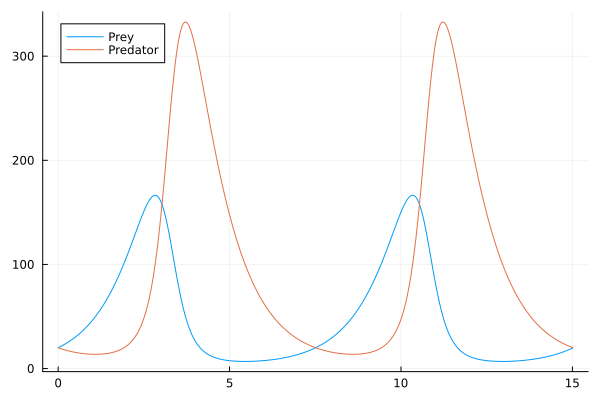

In [6]:
using Plots
plot(sol[:, 1], sol[:, 2], label="Prey")
plot!(sol[:, 1], sol[:, 3], label="Predator")